## Lesson 9 - Deep Neural Networks 
### Author: Ana Javed

### Image Identification 

#### Workplace Scenario

You start working for a new startup building the next generation search engine. The search engine provides the ability to search images with their content. You are tasked to build a machine learning model that is able to identify the objects in images. The model you are building will help in providing the capability to search for 10 objects. Download the L09_ImageClasses.pdf to see a list of the classes in the dataset and 10 random images from each class.

For this project you will use the CIFAR-10 dataset, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


#### Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the CIFAR-10 dataset, create a new notebook to build a TensorlLow model. Perform each of the following tasks and answer the related questions:

1. Read CIFAR-10 dataset from Keras.
2. Explore data
3. Preprocess and prepare data for classification
4. Build a TensorFlow model using a single dense hidden layer
5. Apply model to test set and evaluate accuracy
6. Perform 3 adjusts to the number of layers and activation functions to improve accuracy
7. Summarize your findings regarding the different iterations and any insights gained





In [116]:
## Loading Necessary Packages 
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### 1. Read CIFAR-10 dataset from Keras.

In [117]:
## Loading CIFAR-10 dataset 
## More information here: https://www.tensorflow.org/datasets/catalog/cifar10

data = tf.keras.datasets.cifar10


### 2. Explore data

In [118]:
## Splitting Data into Training and Testing datasets 

(x_train, y_train), (x_test, y_test) = data.load_data()

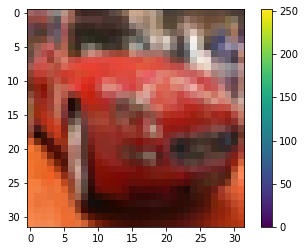

In [119]:
## Plotting image to initially visualize

plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

Here we can see a red automobile. 

In [120]:
## The red automobile image above has a class = '1' 
y_train[5]  

array([1], dtype=uint8)

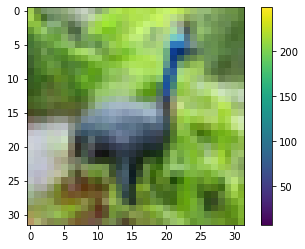

In [121]:
## Another example: 
plt.figure()
plt.imshow(x_train[6])
plt.colorbar()
plt.grid(False)
plt.show()

## Below we see an image of a blue bird 

In [122]:
## The blue bird image above has a class = '2' 
y_train[6]  

array([2], dtype=uint8)

/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


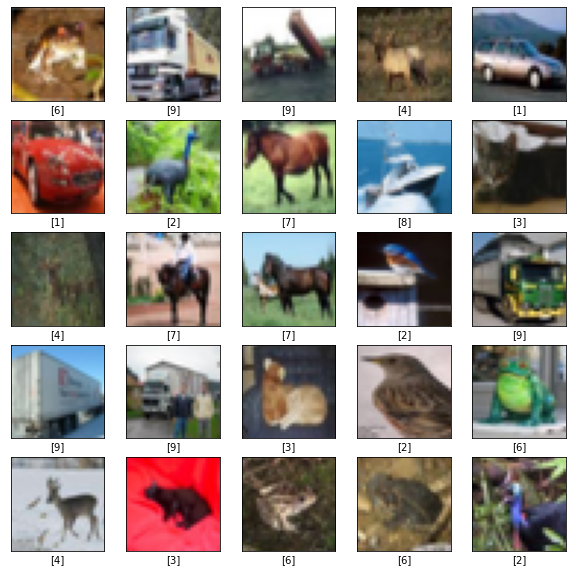

In [123]:
## Plotting our images with their associated class: 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#### The classes have the following indices:

- Airplane = 0
- Automobile = 1
- Bird = 2
- Cat = 3
- Deer = 4
- Dog = 5
- Frog = 6 
- Horse = 7
- Ship = 8
- Truck = 9 

### 3. Preprocess and prepare data for classification

In [124]:
## Scaling Data - dividing the arrays by 255.0 since the images are about 255 x 255 pixels 

x_train, x_test = x_train / 255.0, x_test / 255.0


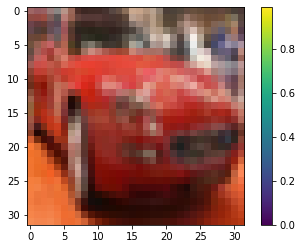

In [125]:
## Ensuring the test images are the same but scaled 
plt.figure()
plt.imshow(x_train2[5])
plt.colorbar()
plt.grid(False)
plt.show()


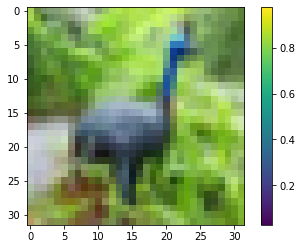

In [126]:
## Ensuring the test images are the same but scaled 
plt.figure()
plt.imshow(x_train2[6])
plt.colorbar()
plt.grid(False)
plt.show()


### 4. Build a TensorFlow model using a single dense hidden layer


In [127]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),    # Input Layer
    keras.layers.Dense(128, activation=tf.nn.relu), # Hidden Layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # Output Layer 
])

In [128]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 5. Apply model to test set and evaluate accuracy

In [129]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 20s 10ms/step - loss: 1.9977 - accuracy: 0.2869
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7491 - accuracy: 0.3736
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6702 - accuracy: 0.4085
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6374 - accuracy: 0.4182
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6046 - accuracy: 0.4315


In [130]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 4ms/step - loss: 1.5881 - accuracy: 0.4366
Test accuracy: 0.436599999666214


### 6. Perform 3 adjusts to the number of layers and activation functions to improve accuracy


In [131]:
""" 
I made the following adjustments: 
- Increased the first Dense Layer units to 200 
- Increased the second Dense Layer units to 20
- Increased number of Epochs to 8 

"""

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),    # Input Layer
    keras.layers.Dense(200, activation=tf.nn.relu),   # Hidden Layer
    keras.layers.Dense(20, activation=tf.nn.softmax)  # Output Layer 
])

In [132]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [135]:
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5043 - accuracy: 0.4635
Epoch 2/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4889 - accuracy: 0.4702
Epoch 3/8
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4769 - accuracy: 0.4745
Epoch 4/8
1563/1563 [==============================] - 13s 9ms/step - loss: 1.4702 - accuracy: 0.4776
Epoch 5/8
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4583 - accuracy: 0.4812
Epoch 6/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4512 - accuracy: 0.4843
Epoch 7/8
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4456 - accuracy: 0.4858
Epoch 8/8
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4383 - accuracy: 0.4890


In [136]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.5192 - accuracy: 0.4636
Test accuracy: 0.4636000096797943


### 7. Summarize your findings regarding the different iterations and any insights gained

The adjustments made to the deep learning model included increasing the first dense layer units to 200, increasing the second dense layer to 20, and increasing the epochs to 8. While making these adjustments, I also adjusted the activation functions to log soft max, soft touch, and selu - however each change dropped the original model accuracy by 50%. Thus I did not make any changes to the activation functions and continued to focus on the units and epochs.

One concern I had when increasing the units and number of epochs is the risk of overfitting. I did not want the model to have a high accuracy rate for the training dataset and underperform on the test dataset. When I made the following changes mentioned above, I noticed that the accuracy of the training dataset was 48.9% after the 8th epoch, and the accuracy of the test dataset was 46.3% - which is close but still lower. The accuracy of the test dataset is about 2% lower which could indicate some overfitting. 

The test accuracy of this model however is still an improvement from the original model since it has increased approximately 3%. 

Since 46.3% is still a low accuracy rate, I would explore additional activation functions that can be utilized. I would also explore adding extra hidden layers to the model and test whether the deep learning model performs better.